In [6]:
pip install mlxtend

  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.4 MB/s  0:00:00
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl (8.1 MB)
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.3 MB 5.5 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/12.3 MB 5.5 MB/s eta 0:00:02
   ----------- ---------------------------- 3.4/12.3 MB 5.6 MB/s eta 0:00:02
   -------------- ------------------------- 4.5/12.3 MB 5.6 MB/s eta 0:00:02
   ----------------- ---------------------- 5.5/12.3 MB 5.4 MB/s eta 0:00:02
   -------------------- ------------------- 6.3/12.3 MB 5.2 MB/s eta 0

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Problem Statement

Retail stores collect large amounts of transaction data, but it is difficult to manually identify relationships between products.

The goal of this project is to use Association Rule Mining to discover frequent product combinations and generate recommendation rules.

This helps businesses:

Recommend related products

Increase cross-selling

Improve store layout

Increase revenue

# libraries

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

# dataset


In [13]:


transactions = []

with open("groceries.csv", "r") as file:
    for line in file:
        transactions.append(line.strip().split(","))

# Check first 5 transactions
transactions[:5]


[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

# Convert Transactions into One-Hot Encoding

In [14]:
te = TransactionEncoder()

te_array = te.fit(transactions).transform(transactions)

data = pd.DataFrame(te_array, columns=te.columns_)

data.head()


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [16]:
#dataset size
print("Number of transactions:", data.shape[0])
print("Number of unique items:", data.shape[1])


Number of transactions: 9835
Number of unique items: 171


# visualizing most frequent items

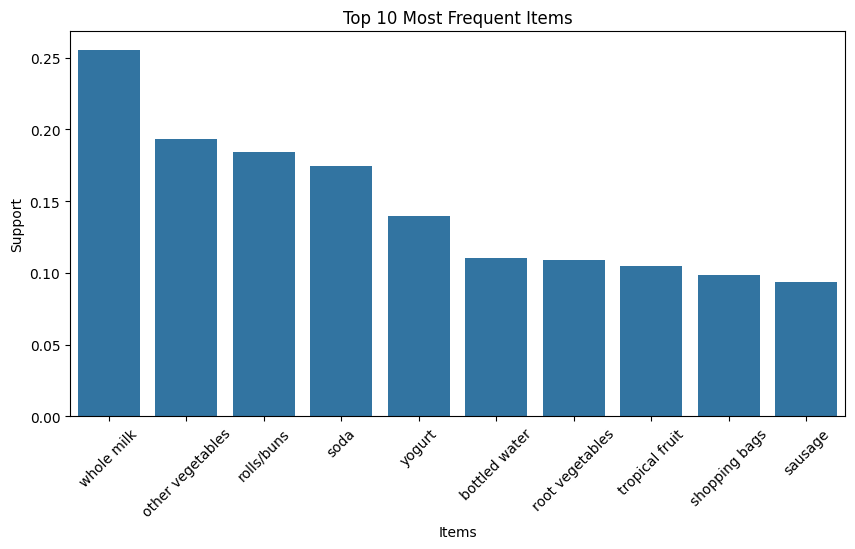

In [17]:
item_support = data.mean().sort_values(ascending=False)

top_items = item_support.head(10)

plt.figure(figsize=(10,5))

sns.barplot(x=top_items.index, y=top_items.values)

plt.title("Top 10 Most Frequent Items")

plt.xlabel("Items")
plt.ylabel("Support")

plt.xticks(rotation=45)

plt.show()


## Apriori algorithm

In [18]:
frequent_itemsets_apriori = apriori(
    data,
    min_support=0.01,
    use_colnames=True
)

frequent_itemsets_apriori.head()


,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)


In [20]:
#Association Rules using Apriori
rules_apriori = association_rules(
    frequent_itemsets_apriori,
    metric="confidence",
    min_threshold=0.3
)

rules_apriori.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,1.0,0.009574,1.292416,0.512224,0.087191,0.226255,0.238957
1,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,1.0,0.011668,1.332628,0.708251,0.120677,0.249603,0.245455
2,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,1.0,0.007845,1.251315,0.389597,0.074113,0.200841,0.244103
3,(berries),(other vegetables),0.033249,0.193493,0.010269,0.308869,1.596280,1.0,0.003836,1.166938,0.386391,0.047440,0.143056,0.180971
4,(berries),(whole milk),0.033249,0.255516,0.011795,0.354740,1.388328,1.0,0.003299,1.153774,0.289329,0.042584,0.133279,0.200450


Visualize Support vs Confidence (Apriori)

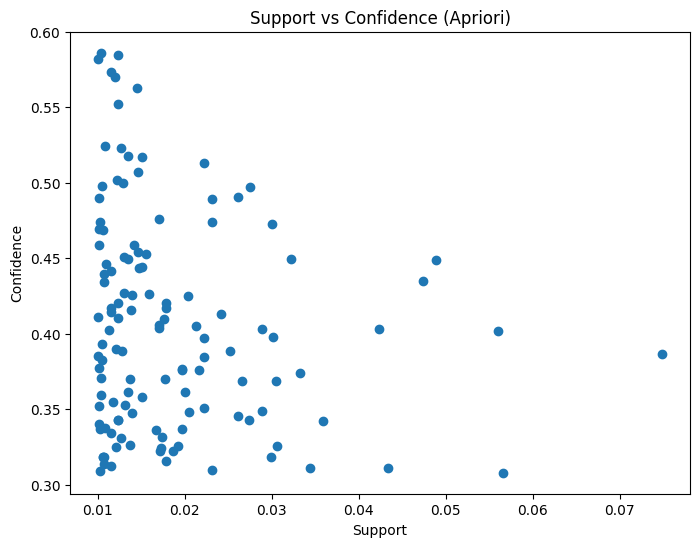

In [21]:
plt.figure(figsize=(8,6))

plt.scatter(
    rules_apriori['support'],
    rules_apriori['confidence']
)

plt.title("Support vs Confidence (Apriori)")

plt.xlabel("Support")
plt.ylabel("Confidence")

plt.show()


## FP-Growth algorithm

In [22]:
frequent_itemsets_fp = fpgrowth(
    data,
    min_support=0.01,
    use_colnames=True
)

frequent_itemsets_fp.head()


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.139502,(yogurt)
4,0.104931,(tropical fruit)


In [23]:
#Association Rules using FP-Growth
rules_fp = association_rules(
    frequent_itemsets_fp,
    metric="confidence",
    min_threshold=0.3
)

rules_fp.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,1.0,0.009355,1.179008,0.334375,0.099108,0.151829,0.243965
1,(citrus fruit),(other vegetables),0.082766,0.193493,0.028876,0.348894,1.803140,1.0,0.012862,1.238674,0.485603,0.116728,0.192685,0.249066
2,"(citrus fruit, whole milk)",(yogurt),0.030503,0.139502,0.010269,0.336667,2.413350,1.0,0.006014,1.297233,0.604064,0.064290,0.229129,0.205141
3,"(citrus fruit, yogurt)",(whole milk),0.021657,0.255516,0.010269,0.474178,1.855768,1.0,0.004736,1.415849,0.471348,0.038476,0.293710,0.257185
4,"(citrus fruit, whole milk)",(other vegetables),0.030503,0.193493,0.013015,0.426667,2.205080,1.0,0.007113,1.406699,0.563696,0.061687,0.289116,0.246964


## Visualize Support vs Lift

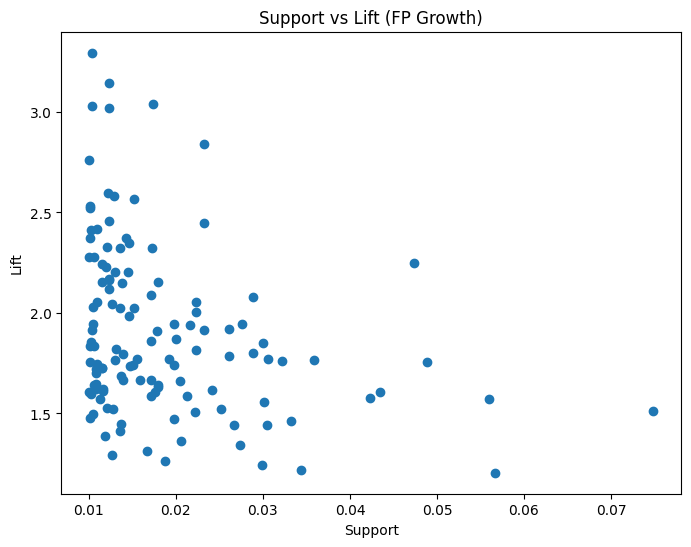

In [24]:
plt.figure(figsize=(8,6))

plt.scatter(
    rules_fp['support'],
    rules_fp['lift']
)

plt.title("Support vs Lift (FP Growth)")

plt.xlabel("Support")
plt.ylabel("Lift")

plt.show()


## Top Recommendation Rules

In [26]:
top_rules = rules_fp.sort_values(
    by="confidence",
    ascending=False
)

top_rules[
    ['antecedents','consequents','support','confidence','lift']
].head(10)


,antecedents,consequents,support,confidence,lift
6,"(citrus fruit, root vegetables)",(other vegetables),0.010371,0.586207,3.029608
26,"(root vegetables, tropical fruit)",(other vegetables),0.012303,0.584541,3.020999
56,"(yogurt, curd)",(whole milk),0.010066,0.582353,2.279125
42,"(butter, other vegetables)",(whole milk),0.011490,0.573604,2.244885
28,"(root vegetables, tropical fruit)",(whole milk),0.011998,0.570048,2.230969
84,"(root vegetables, yogurt)",(whole milk),0.014540,0.562992,2.203354
116,"(domestic eggs, other vegetables)",(whole milk),0.012303,0.552511,2.162336
101,"(whipped/sour cream, yogurt)",(whole milk),0.010880,0.524510,2.052747
83,"(rolls/buns, root vegetables)",(whole milk),0.012710,0.523013,2.046888
32,"(pip fruit, other vegetables)",(whole milk),0.013523,0.517510,2.025351


 ## Rule Interpretation (Example):

yogurt → whole milk

Confidence = 0.4  
Lift = 1.6  

Meaning:

40% of customers who buy yogurt also buy whole milk.

Lift greater than 1 indicates strong association.


## Algorithm Comparison

Apriori:
- Slow
- Candidate generation required

FP-Growth:
- Faster
- Uses tree structure
- More efficient


## Conclusion

Association Rule Mining was used to analyze customer transactions.

Apriori and FP-Growth algorithms identified frequent itemsets and association rules.

Support, Confidence, and Lift metrics were used to evaluate rule strength.

FP-Growth performed faster and is better for large datasets.

This project can be used to build recommendation systems and improve business sales.
